# Preparing the lines table

It is recommended that you prepare a generic [line bands table](../1_introduction/3_line_bands.ipynb) containing the lines you expect to find in your astronomical objects and scientific projects.  

Afterward, you can tailor this template to the specific features and artifacts present in each spectrum as needed.

## Generic lines template

You can adjust [$\mathrm{LiMe}$ lines database](../1_introduction/4_lines_database.ipynb) using the [$\texttt{lime.lines\_frame}$](../4_references/outputs1_measurements.rst) function.

In [13]:
from pathlib import Path
import lime


# State the data files
cfgFile = '../0_resources/long_slit.toml'
obsFitsFile = '../0_resources/spectra/gp121903_osiris.fits'
osiris_gp_df_path = Path('../0_resources/bands/osiris_green_peas_linesDF.txt')
gp121903_df_path = '../0_resources/bands/gp121903_bands.txt'

# Load configuration
obs_cfg = lime.load_cfg(cfgFile)

# Prepare lines template for emission lines galaxy
osiris_gp_df = lime.lines_frame(wave_intvl=[3000, 10000], 
                                rejected_lines=['S3_3722A', 'Fe3_4008A', 'S2_4076A',
                                               'Fe2_4358A', 'Fe3_4881A', 'Ar3_5192A'])
lime.save_frame(osiris_gp_df_path, osiris_gp_df)

print(osiris_gp_df)

           wavelength  wave_vac           w1           w2           w3  \
Ne5_3345A    3345.400  3346.400  3334.246902  3338.698612  3340.936379   
Ne5_3426A    3425.500  3426.500  3390.000000  3410.000000  3420.929505   
H1_3704A     3703.794  3704.906  3671.309441  3681.364925  3698.852189   
O2_3726A     3725.974  3727.092  3665.750000  3694.260000  3721.002595   
O2_3729A     3728.756  3729.875  3665.750000  3694.260000  3723.780884   
...               ...       ...          ...          ...          ...   
H1_9015A     9014.774  9017.385  8975.870000  9001.890000  9002.745980   
S3_9068A     9068.500  9071.100  9028.280000  9056.360000  9056.400296   
H1_9229A     9228.875  9231.547  9198.107216  9210.388042  9216.561315   
S3_9530A     9530.400  9533.200  9471.122554  9489.978978  9517.684003   
H1_9546A     9545.830  9548.590  9471.122554  9489.978978  9533.093415   

                    w4           w5           w6               latex_label  \
Ne5_3345A  3349.863621  3352.0894

<div class="alert alert-success">

**Please note:** Your lines table template should not include [merged](../1_introduction/2_line_labels.ipynb) or [blended](../1_introduction/2_line_labels.ipynb) lines. 

</div>

## Object lines template

If you create a [$\texttt{lime.Spectrum}$](../1_introduction/1_observations.ipynb):

In [3]:
# Load observation data
z_obj = obs_cfg['osiris']['gp121903']['z']
norm_flux = obs_cfg['osiris']['norm_flux']
gp_spec = lime.Spectrum.from_file(obsFitsFile, instrument='osiris', redshift=z_obj, norm_flux=norm_flux)

You can use [$\texttt{lime.Spectrum.retrieve.lines\_frame}$](../1_introduction/1_observations.ipynb) to further adjust the default or input lines frame to match your observation:


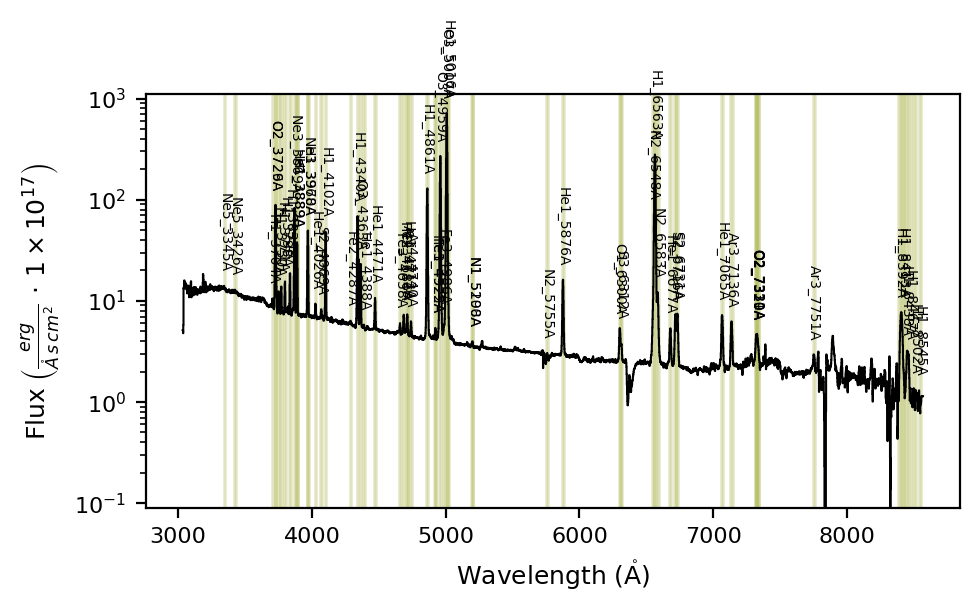

In [4]:
# Generate the object lines table from the previous template
obj_linesDF = gp_spec.retrieve.lines_frame(ref_bands=osiris_gp_df_path)
gp_spec.plot.spectrum(bands=obj_linesDF, log_scale=True, rest_frame=True)

The [$\texttt{lime.Spectrum.retrieve.lines\_frame}$](../1_introduction/1_observations.ipynb) function shares most arguments with [$\texttt{lime.lines\_frame}$](../4_references/outputs1_measurements.rst) (except for ``wave_intvl`` and ``redshift``, which are taken from the spectrum), and also provides additional arguments to group the lines.

### Explicit grouping:

If you provide a configuration file or dictionary in ``fit_cfg``, the function will check it for [merged](../1_introduction/2_line_labels.ipynb) and [blended](../1_introduction/2_line_labels.ipynb) lines and include them in the output lines frame:

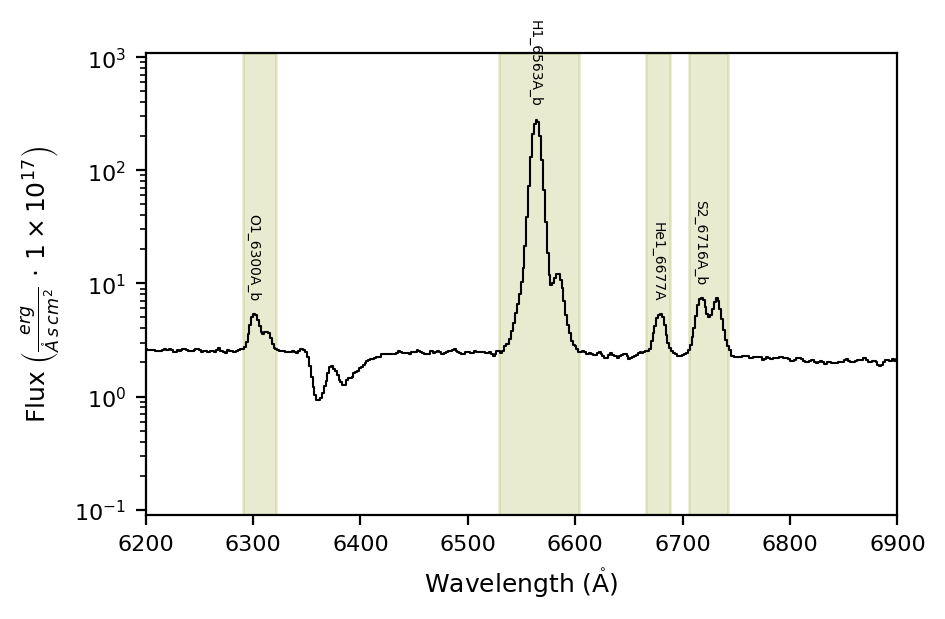

In [5]:
# Generate the object lines table from the previous template
obj_linesDF = gp_spec.retrieve.lines_frame(band_vsigma=100, n_sigma=4, instrumental_correction=True,
                                           map_band_vsigma={'H1_4861A': 200, 'H1_6563A': 200,
                                                            'N2_6548A': 200, 'N2_6583A': 200,
                                                            'O3_4959A': 250, 'O3_5007A': 250},
                                           fit_cfg={'O2_3726A_m': 'O2_3726A+O2_3729A',
                                                          'H1_3889A_m': "H1_3889A+He1_3889A",
                                                          'Ne3_3968A_m': "Ne3_3968A+H1_3970A",
                                                          'Ar4_4711A_m': "Ar4_4711A+He1_4713A",
                                                          'Fe3_4925A_m': 'He1_4922A+Fe3_4925A',
                                                          'N1_5198A_m': "N1_5198A+N1_5200A",
                                                          'O1_6300A_b': "O1_6300A+S3_6312A",
                                                          'H1_6563A_b': "H1_6563A+N2_6583A+N2_6548A",
                                                          'S2_6716A_b': "S2_6716A+S2_6731A"},
                                           ref_bands=osiris_gp_df_path)

gp_spec.plot.spectrum(bands=obj_linesDF, log_scale=True, rest_frame=True, in_fig=None)
gp_spec.plot.ax.set_xlim(6200, 6900)
gp_spec.plot.show()

You can constrain the grouped lines from ``fit_cfg`` to a sublist using the ``grouped_lines`` argument:

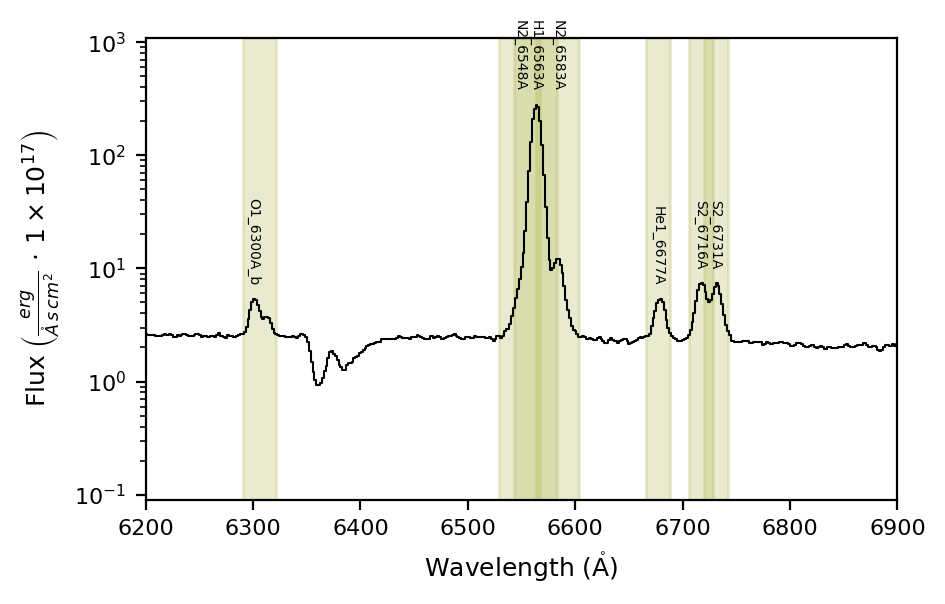

In [6]:
# Generate the object lines table from the previous template
obj_linesDF = gp_spec.retrieve.lines_frame(band_vsigma=100, n_sigma=4, instrumental_correction=True,
                                           map_band_vsigma={'H1_4861A': 200, 'H1_6563A': 200,
                                                            'N2_6548A': 200, 'N2_6583A': 200,
                                                            'O3_4959A': 250, 'O3_5007A': 250},
                                           fit_cfg=obs_cfg,
                                           grouped_lines=['O1_6300A_b'],
                                           ref_bands=osiris_gp_df_path)

gp_spec.plot.spectrum(bands=obj_linesDF, log_scale=True, rest_frame=True, in_fig=None)
gp_spec.plot.ax.set_xlim(6200, 6900)
gp_spec.plot.show()

In this case only **O1_6300A_b** is grouped:

In [7]:
obj_linesDF.iloc[30:45]['group_label']

O3_4959A                   none
Fe3_4986A                  none
O3_5007A                   none
He1_5016A                  none
N1_5198A                   none
N1_5200A                   none
N2_5755A                   none
He1_5876A                  none
O1_6300A_b    O1_6300A+S3_6312A
N2_6548A                   none
H1_6563A                   none
N2_6583A                   none
He1_6677A                  none
S2_6716A                   none
S2_6731A                   none
Name: group_label, dtype: object

### Automatic grouping:

In the scenario where you have many observations with variable resolving power, certain transitions can be merged or blended. 

$\mathrm{LiMe}$ can review the spectral bands and the pixel width of the spectrum to get the best group for each observation. In this case you need to set the argument ``automatic_grouping=True``.

For example, our configuration file has a blended and merged groups for the same lines (such as **S2_6716A_b/S2_6716A_m** or **H1_6563A_m/H1_6563A_b**)

In [8]:
obs_cfg['default_line_fitting']

{'transitions': {'O2_3726A_m': {'wavelength': 3728.484}},
 'O2_3726A_m': 'O2_3726A+O2_3729A',
 'O2_3726A_b': 'O2_3726A+O2_3729A',
 'H1_3889A_m': 'H1_3889A+He1_3889A',
 'Ne3_3968A_m': 'Ne3_3968A+H1_3970A',
 'Ar4_4711A_m': 'Ar4_4711A+He1_4713A',
 'Fe3_4925A_m': 'He1_4922A+Fe3_4925A',
 'N1_5198A_m': 'N1_5198A+N1_5200A',
 'O1_6300A_b': 'O1_6300A+S3_6312A',
 'H1_6563A_m': 'H1_6563A+N2_6583A+N2_6548A',
 'H1_6563A_b': 'H1_6563A+N2_6583A+N2_6548A',
 'S2_6716A_b': 'S2_6716A+S2_6731A',
 'S2_6716A_m': 'S2_6716A+S2_6731A',
 'O2_7319A_b': 'O2_7319A_m+O2_7330A_m',
 'O2_7319A_m': 'O2_7319A+O2_7320A',
 'O2_7330A_m': 'O2_7330A+O2_7331A',
 'continuum': {'degree_list': [3, 6, 6], 'emis_threshold': [3, 2, 1.5]},
 'peaks_troughs': {'sigma_threshold': 3}}

So if we run:

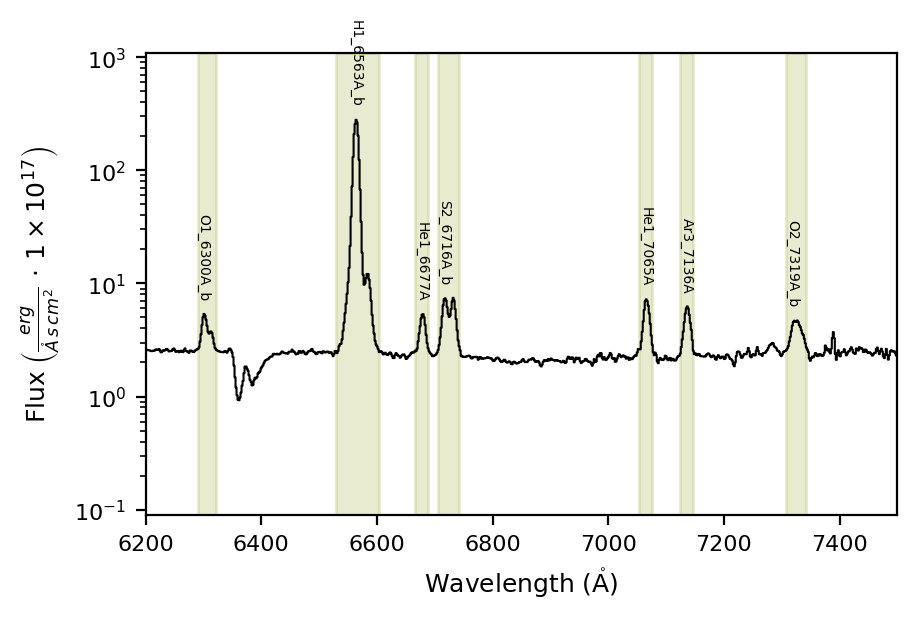

In [9]:
# Generate the object lines table from the previous template
obj_linesDF = gp_spec.retrieve.lines_frame(band_vsigma=100, n_sigma=4, instrumental_correction=True,
                                           map_band_vsigma={'H1_4861A': 200, 'H1_6563A': 200,
                                                            'N2_6548A': 200, 'N2_6583A': 200,
                                                            'O3_4959A': 250, 'O3_5007A': 250},
                                           fit_cfg=obs_cfg,
                                           automatic_grouping=True,
                                           ref_bands=osiris_gp_df_path)

gp_spec.plot.spectrum(bands=obj_linesDF, log_scale=True, rest_frame=True, in_fig=None)
gp_spec.plot.ax.set_xlim(6200, 7500)
gp_spec.plot.show()

The correct line groups have been properly selected.

<div class="alert alert-warning">

**Please note:** In addition to the ``Rayleigh_threshold`` argument, the order of the groups in the input configuration affects the grouping algorithm. For example, **H1_6563A_m='H1_6563A+N2_6583A+N2_6548A'** is evaluated before **H1_6563A_b='H1_6563A+N2_6583A+N2_6548A'**. This can be used as a mechanism to give certain groups higher priority.

Additionally, the current automatic grouping does not take kinematic components into consideration, and these components will be excluded from the group. Please check this function’s documentation for further insight.

</div>


### Advanced grouping

The [$\texttt{lime.Spectrum.retrieve.lines\_frame}$](../1_introduction/1_observations.ipynb) accepts multiple levels, as in the case of [multi-object fitting](../1_introduction/5_fitting_configuration.ipynb), you can provide local object section from the configuration file to update (default) or overwrite the input configuration.

For example in our configuration file we have a section with additional settings:

In [10]:
obs_cfg['gp121903_osiris_line_fitting']

{'grouped_lines': ['O3_5007A_b', 'O3_4959A_b'],
 'rejected_lines': ['Fe3_4986A',
  'He1_5016A',
  'H1_8392A',
  'H1_8413A',
  'H1_8438A',
  'H1_8467A',
  'H1_8502A',
  'H1_8545A'],
 'O3_4959A_b': 'O3_4959A+O3_4959A_k-1',
 'O3_5007A_b': 'O3_5007A+O3_5007A_k-1',
 'O3_5007A_k-1_amp': {'expr': '<100.0*O3_5007A_amp', 'min': 0.0},
 'O3_5007A_k-1_sigma': {'expr': '>2.0*O3_5007A_sigma'},
 'H1_6563A_b': 'H1_6563A+N2_6583A+N2_6548A',
 'N2_6548A_amp': {'expr': 'N2_6583A_amp/2.94'},
 'N2_6548A_kinem': 'N2_6583A',
 'S2_6716A_b': 'S2_6716A+S2_6731A',
 'S2_6731A_kinem': 'S2_6716A',
 'O2_7330A_m_kinem': 'O2_7319A_m'}

If we include the section prefix in the ``obj_cfg_prefix`` argument, we can further adjust the bands for this object:

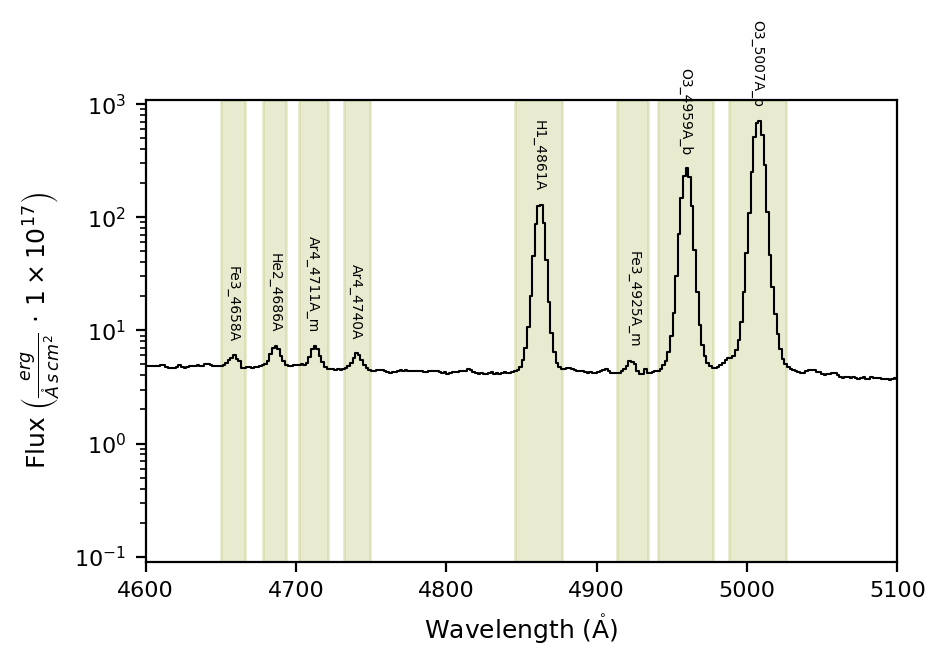

In [11]:
# Generate the object lines table from the previous template
obj_linesDF = gp_spec.retrieve.lines_frame(band_vsigma=100, n_sigma=4, instrumental_correction=True,
                                           map_band_vsigma={'H1_4861A': 200, 'H1_6563A': 200,
                                                            'N2_6548A': 200, 'N2_6583A': 200,
                                                            'O3_4959A': 250, 'O3_5007A': 250},
                                           fit_cfg=obs_cfg, obj_cfg_prefix='gp121903_osiris',
                                           automatic_grouping=True, 
                                           ref_bands=osiris_gp_df_path)

gp_spec.plot.spectrum(bands=obj_linesDF, log_scale=True, rest_frame=True, in_fig=None)
gp_spec.plot.ax.set_xlim(4600, 5100)
gp_spec.plot.show()

In [12]:
lime.save_frame(gp121903_df_path, obj_linesDF)

Several things are happening here:

* The ``rejected_lines`` are automatically read from the input configuration (that’s why we don’t have **Fe3_4986A** or **He1_5016A** now).
* The ``grouped_lines`` are also read from the input configuration. However, because we are using the ``automatic_grouping=True`` argument, the other lines are considered as well, although the ``grouped_lines`` take priority.
* The current automatic grouping does not take kinematic components into consideration. Therefore, we set ``grouped_lines = ['O3_5007A_b', 'O3_4959A_b']`` to force these groups in the output line bands.


## Takeaways
* Start by generating a lines template for your current project instrument and scientific targets. You can get a copy of the [default $\mathrm{LiMe}$ database](../1_introduction/4_lines_database.ipynb) using the [$\texttt{lime.lines\_frame}$](../4_references/outputs1_measurements.rst) function. 
* Use this template as the ``ref_bands`` in your observation with the [$\texttt{lime.Spectrum.retrieve.lines\_frame}$](../1_introduction/1_observations.ipynb) function.
* Depending on the number of spectra you need to analyze, this function provides several arguments to tailor the output bands: 
    * Specify the line groups you want with the ``fit_cfg`` argument.
    * Provide all candidate groups you may observe in ``fit_cfg`` and then set ``automatic_grouping=True`` for automatic grouping.
    * Combine both approaches with multiple levels in ``fit_cfg`` to set a default behavior for your sample and a ``local`` configuration with the ``obj_cfg_prefix``.
    * Currently, automatic grouping does not consider kinematic components. Therefore, you must set them in the ``grouped_lines`` argument (or fitting configuration file) to make them available when using ``automatic_grouping=True``.
* Check the [API](https://lime-stable.readthedocs.io/en/latest/reference/API.html) for more details on these functions.